# Quand la régression linéaire échoue : Découvre la méthode Theil-Sen

[Lien du post MonShotData](https://www.monshotdata.com/p/regression-theil-sen)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, TheilSenRegressor

sns.set()

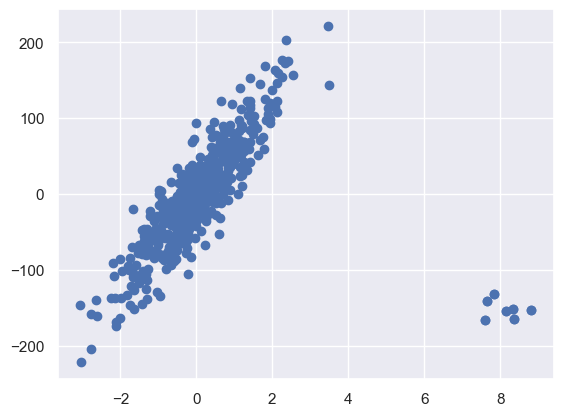

In [2]:
N_SAMPLES = 500
N_OUTLIERS = 7

X, y, coef = datasets.make_regression(
    n_samples = N_SAMPLES, 
    n_features = 1, 
    n_informative = 1, 
    noise = 30, 
    coef = True, 
    # random_state = 11441
)

coef_list = [["original_coef", float(coef)]]

# ajout d'outliers               
# np.random.seed(42)
outliers_x = 8 + 0.75 * np.random.normal(size = (N_OUTLIERS, 1))
outliers_y = -150 + 20 * np.random.normal(size = N_OUTLIERS)

X = np.concatenate((X, outliers_x, outliers_x))
y = np.concatenate((y, outliers_y, outliers_y))

plt.scatter(X, y);

In [3]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [4]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

In [5]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

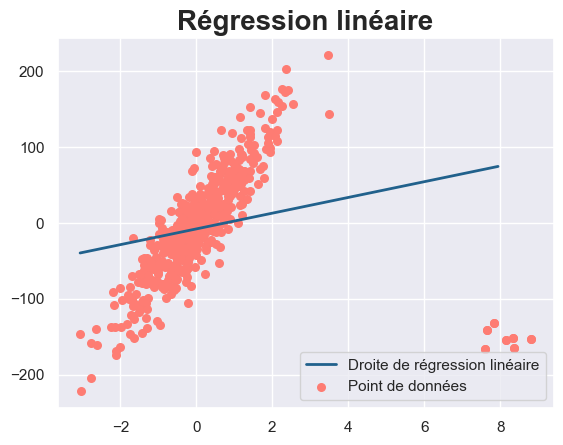

In [6]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "linear_regression", c = colors[8], lw=2, label="Droite de régression linéaire")

plt.scatter(X, y, c = colors[0], s = 30,  label = "Point de données")
plt.legend()
plt.title("Régression linéaire", fontsize=20, fontweight = "bold")

plt.show();

In [7]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

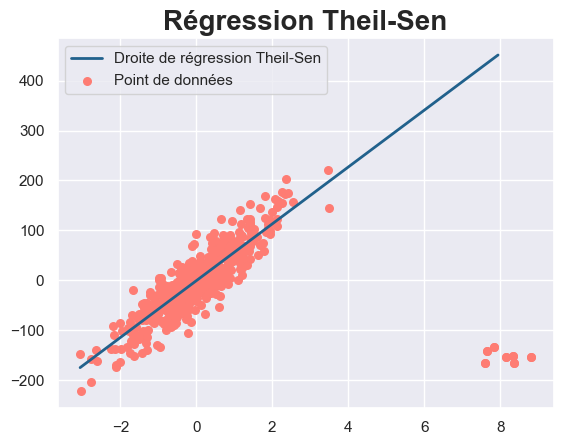

In [8]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "theilsen_regression", c = colors[8], lw=2, label="Droite de régression Theil-Sen")

plt.scatter(X, y, c = colors[0], s = 30, label = "Point de données")
plt.legend()
plt.title("Régression Theil-Sen", fontsize=20, fontweight = "bold")

plt.show();